You are a data analyst working for a tech company closely monitoring the AI tools market. You want to understand the evolving popularity of three major AI tools, ChatGPT, Gemini, and Microsoft Copilot, and identify which tool is gaining the most traction and how they compare over time.


<img src="ai_tools.jpg" align="center"/>

You'll work with real-world time series data that captures the global interest in these tools over several weeks. Your goal is to analyze this data, uncover patterns, and provide actionable insights to help your company make informed decisions. This might include determining where to focus marketing efforts, predicting future trends, or identifying potential areas for improvement.

Are you ready to help your company stay ahead of the curve in the competitive AI tools market? Let's get started!

### The Data

The Google Trends data is available as a CSV file `ai_tools_comparison.csv`.
The data contains the number of worldwide searches for chatGpt, Gemini, and Microsoft Copilot over the past 12 months as of September 2024. 
<!--- Link to query: https://trends.google.com/trends/explore?q=chatgpt,gemini,%2Fg%2F11tsqm45vd&hl=en-US -->

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
trends = pd.read_csv('ai_tools_comparison.csv')

# Inspect the data
trends.head()

,week,chatgpt,gemini,microsoft_copilot
0,2023-08-27,56,3,1
1,2023-09-03,56,3,1
2,2023-09-10,63,3,1
3,2023-09-17,64,3,1
4,2023-09-24,66,3,1


In [116]:
# Start coding here
# Use as many cells as you need


print(trends.head(n = 10))
print(trends.tail())
print(trends.isna().sum()) # checking if the data is clean
print(trends.shape)
trends['week'] = pd.to_datetime(trends['week'])
trends = trends.set_index('week')

         week  chatgpt  gemini  microsoft_copilot
0  2023-08-27       56       3                  1
1  2023-09-03       56       3                  1
2  2023-09-10       63       3                  1
3  2023-09-17       64       3                  1
4  2023-09-24       66       3                  1
5  2023-10-01       67       3                  1
6  2023-10-08       68       4                  1
7  2023-10-15       69       4                  1
8  2023-10-22       71       4                  2
9  2023-10-29       69       3                  2
          week  chatgpt  gemini  microsoft_copilot
49  2024-08-04       75      14                  4
50  2024-08-11       81      14                  4
51  2024-08-18       88      15                  4
52  2024-08-25      100      16                  5
53  2024-09-01       77      14                  3
week                 0
chatgpt              0
gemini               0
microsoft_copilot    0
dtype: int64
(54, 4)


In [117]:
"""
Which AI tool has shown the most consistent growth in interest over the observed period (the full dataset)? Save the name of the tool as most_consistent_tool of type Data type: string.
"""
#recall that the data contains the number of searches!
#to find this statistic we have to compare the growth rates.
print(trends.info())

#calculate the percent change over the 54 weeks, take the standard deviation, and then sort in ascending #order to get the name in the 0-index
std_pct_change_trends = trends.pct_change()
std_pct_change_trends = std_pct_change_trends.std().sort_values(ascending=True)

most_consistent_tool = str(std_pct_change_trends.index[0])
print(most_consistent_tool)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54 entries, 2023-08-27 to 2024-09-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   chatgpt            54 non-null     int64
 1   gemini             54 non-null     int64
 2   microsoft_copilot  54 non-null     int64
dtypes: int64(3)
memory usage: 1.7 KB
None
chatgpt


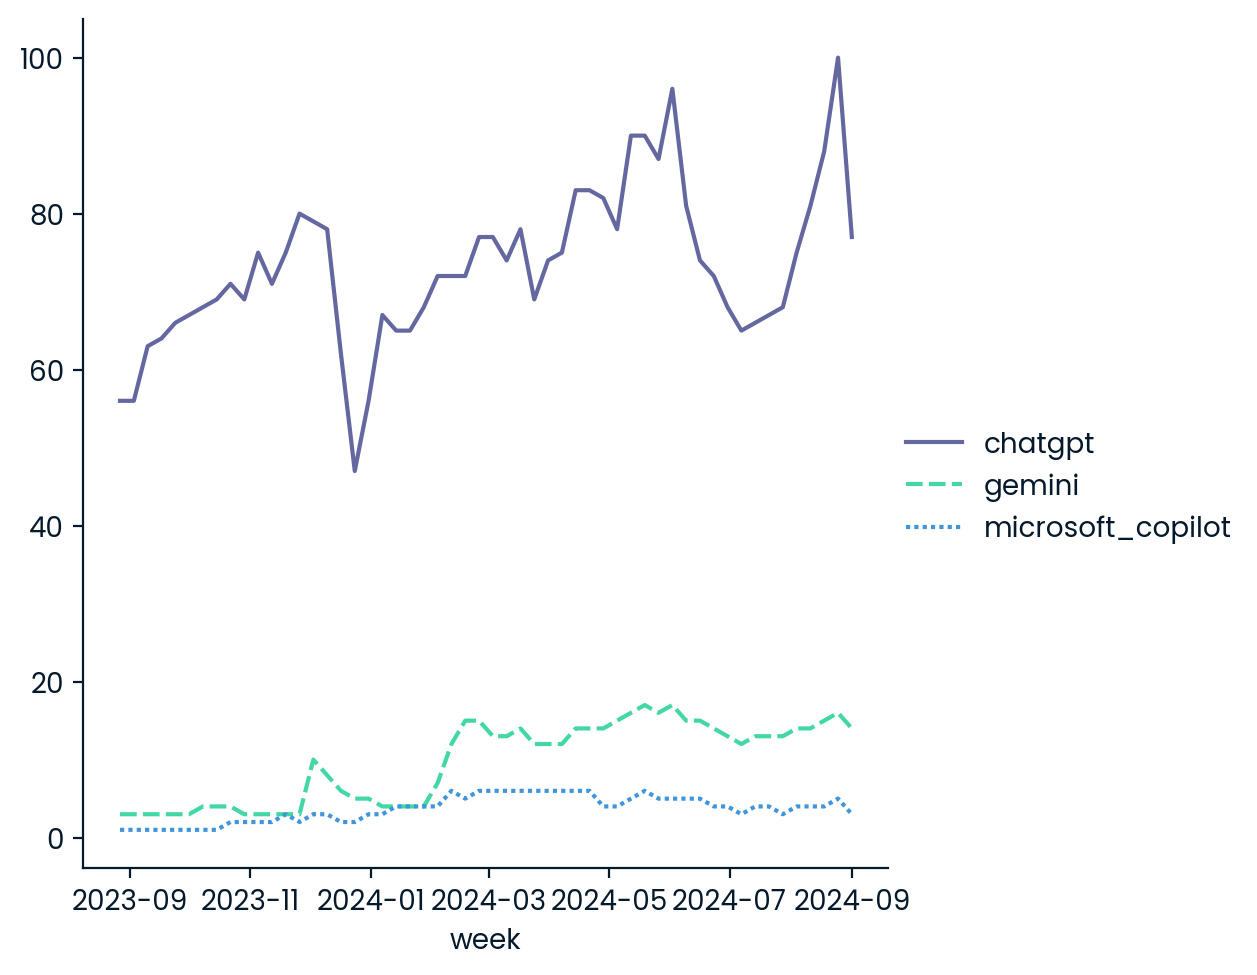

In [118]:
"""
Create a visualization showing the interest levels of ChatGPT, Gemini, and Microsoft Copilot over time. Around which month and year does ChatGPT experience its largest decline in interest? Save as gpt_dip of type string in the format "Month YYYY".
"""
#will make this with seaborn

sns.relplot(data=trends, kind="line")
plt.show()

gpt_dip = "December 2023"



            chatgpt  gemini  microsoft_copilot yr_month
week                                                   
2023-08-27       56       3                  1   2023-8
2023-09-03       56       3                  1   2023-9
2023-09-10       63       3                  1   2023-9
2023-09-17       64       3                  1   2023-9
2023-09-24       66       3                  1   2023-9
          chatgpt  gemini  microsoft_copilot
yr_month                                    
2023-8      56.00    3.00               1.00
2023-9      62.25    3.00               1.00
2023-10     68.80    3.60               1.40
2023-11     75.25    3.00               2.25
2023-12     64.40    6.80               2.60
2024-1      66.25    4.00               3.75
2024-2      73.25   12.25               5.25
2024-3      74.40   12.80               6.00
2024-4      80.75   13.50               5.50
2024-5      86.25   16.00               5.00
2024-6      78.20   14.80               4.60
2024-7      66.50   12.

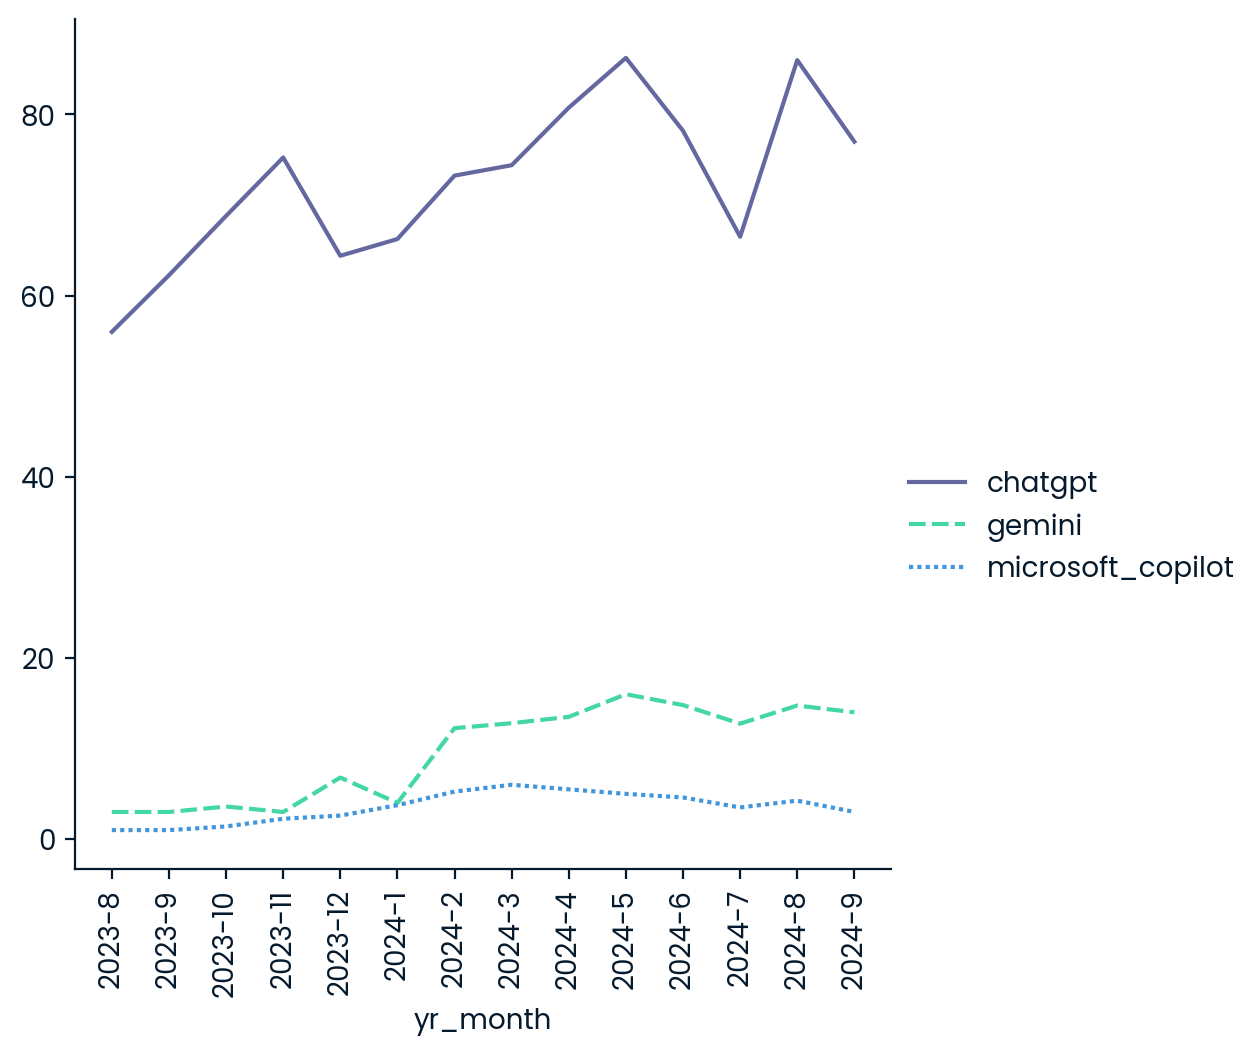

In [129]:
"""
Explore the seasonality in the data by breaking it down into monthly averages. What month had the highest average interest across all tools? Save the month as best_month as type string.
"""
#extract the year and month using datetime index since our time was already in the index. 
trends["year"] = trends.index.year.astype(str)
trends["month"] = trends.index.month.astype(str)
trends['yr_month'] = trends["year"] + '-' + trends["month"]

#drop the unused columns
trends.drop(['year', 'month'], axis=1, inplace=True)

#now we can group by the Yr-month so we don't mistakenly group months in a different year!
print(trends.head())
monthly_avgs = trends.groupby(by='yr_month', sort=False).mean()
print(monthly_avgs)

sns.relplot(data=monthly_avgs, kind='line')
plt.xticks(rotation=90)
plt.show()

best_month = 'May 2024'